<a href="https://colab.research.google.com/github/jihankaruniaa/Pembelajaran-Mesin/blob/main/Jobsheet%209%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Sheet 9: Perceptron dan ANN

## Praktikum 1 : Klasifikasi Iris dengan Perceptron

Langkah 1 - Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Langkah 2 - Load Data dan Visualisasi

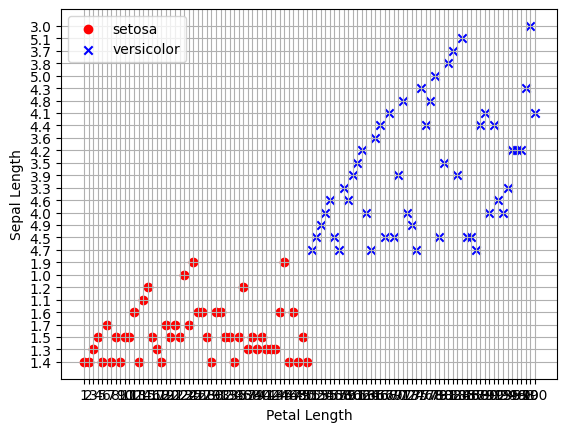

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 7/Iris.csv', header=None)
setosa = df[df[5] == 'Iris-setosa']
versicolor = df[df[5] == 'Iris-versicolor']
virginica = df[df[5] == 'Iris-virginica']

a, b = 0, 3
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Langkah 3 - Membuat Kelas Perceptron

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0] += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Langkah 4 - Pilih Data dan Encoding Label


In [ ]:
y = df.iloc[1:101, 5].values # pilih 100 data awal
y = np.where(y == 'Iris-setosa', -1, 1) # ganti coding label
X = df.iloc[1:101, [1, 4]].values # slice data latih
X = X.astype(float)

Langkah 5 - Fitting Model

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X.astype(float), y)

Langkah 6 - Visualisasi Nilai Error Per Epoch

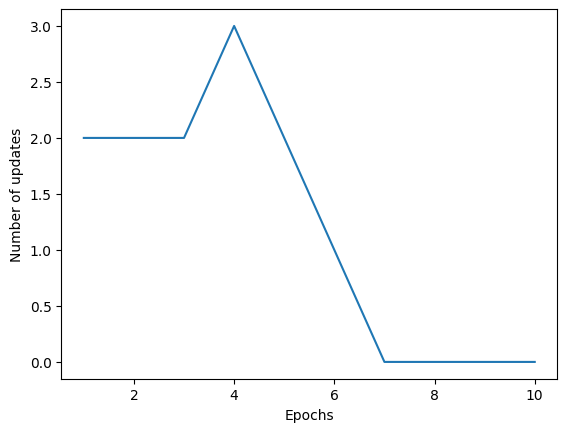

In [ ]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Langkah 7 - Visualiasasi Decision Boundary

<ipython-input-11-dfc84c1125d2>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


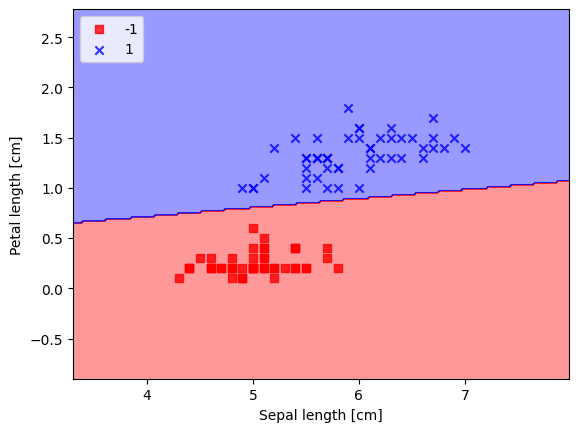

In [ ]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

# Memanggil fungsi plot_decision_regions
plot_decision_regions(X, y, classifier=ppn)

# Tambahkan label dan legend
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Praktikum 2 : Klasifikasi Berita dengan Perceptron

Langkah 1 - Import Library

In [ ]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

Langkah 2 - Pilih Label dan Split Data

In [ ]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron

In [ ]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



## Praktikum 3 : Nilai Logika XOR dengan MLP

Langkah 1 - Import Library

In [ ]:
from sklearn.neural_network import MLPClassifier

Langkah 2 - Buat Data

In [ ]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

Langkah 3 - Fit Model

In [ ]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

Langkah 4 - Prediksi

In [ ]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


## Praktikum 4 : Klasifikasi dengan ANN

### Pra Pengolahan Data

Langkah 1 - Import Library

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

Langkah 2 - Load Data

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/SEMESTER 5/Pembelajaran Mesin/Jobsheet 9/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


Langkah 3 - Encoding Data Kategorikal

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


Langkah 5 - Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Langkah 6 - Scaling Fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Membuat Model ANN

Langkah 1 - Inisiasi Model ANN

In [ ]:
ann = tf.keras.models.Sequential()

Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Langkah 3 - Membuat Hidden Layer Kedua

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Langkah 4 - Membuat Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Training Model

Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Langkah 2 - Fitting Model

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4546 - loss: 0.8316
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7929 - loss: 0.5158
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7941 - loss: 0.4749
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.4413
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8141 - loss: 0.4350
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8173 - loss: 0.4211
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8210 - loss: 0.4167
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8194 - loss: 0.4079
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.3994
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8262 - loss: 0.4033
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - loss: 0.3977
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

### Membuat Prediksi
Diberikan informasi sebagai berikut,
- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: 50000
Apakah customer tersebut perlu dipertahankan?

**Modelkan Data Baru dan Buat Prediksi**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Melakukan prediksi dengan data pelanggan baru
new_customer = [[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
new_customer_scaled = sc.transform(new_customer)  # Scaling data sesuai standar training
prediksi = ann.predict(new_customer_scaled) > 0.5  # Prediksi churn (True jika > 0.5)

# Menampilkan hasil prediksi
print(prediksi)  # Hasilnya akan berupa True atau False

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[False]]


**Prediksi Dengan Data Testing**

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Cek Akurasi dan Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1509   86]
 [ 191  214]]


0.8615

## TUGAS
- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap
    - Metode pra pengolahan
    - Pemilihan fitur
    - Arsitektur ANN
    - Fungsi Aktiviasi

- ANN diimplementasikan dengan menggunakan tensorflow.
- DIKERJAKAN SECARA BERKELOMPOK
- JELASKAN HASIL YANG ANDA DAPATKAN,
    - AKURASI
    - CONFUSION MATRIX
    - KONFIGURASI MODEL -> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

##### 1. Pra-Pemrosesan Data
**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


**Load Dataset**

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data to be 2D (samples, features)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### 2. Pemilihan Fitur
Karena data MNIST terdiri dari gambar digit yang telah diubah menjadi vektor 1D, semua pixel gambar dapat dianggap sebagai fitur. Dalam hal ini, semua 784 fitur (28x28) akan digunakan untuk pelatihan.

##### 3. Arsitektur ANN

In [ ]:
# Build ANN model
model = models.Sequential()
model.add(layers.Dense(units=128, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))  # Output layer with softmax for multi-class classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### 4. Fungsi Aktivasi
- Hidden Layers: Menggunakan fungsi aktivasi ReLU (Rectified Linear Unit) yang umum digunakan untuk hidden layer.
- Output Layer: Menggunakan softmax untuk output layer agar menghasilkan probabilitas untuk masing-masing kelas (digit 0-9).

##### 5. Training Model

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8382 - loss: 0.5367 - val_accuracy: 0.9602 - val_loss: 0.1368
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9542 - loss: 0.1546 - val_accuracy: 0.9666 - val_loss: 0.1099
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9641 - loss: 0.1123 - val_accuracy: 0.9686 - val_loss: 0.1010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9692 - loss: 0.0969 - val_accuracy: 0.9733 - val_loss: 0.0894
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9759 - loss: 0.0797 - val_accuracy: 0.9733 - val_loss: 0.0977
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9769 - loss: 0.0710 - val_accuracy: 0.9677 - val_loss: 0.1060
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9795 - loss: 0.0647 - val_accuracy: 0.9757 - val_loss: 0.0874
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9816 - loss: 0.0588 -

##### 6. Evaluasi Model

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print accuracy and confusion matrix
print(f'Accuracy: {test_accuracy}')
print('Confusion Matrix:')
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9753 - loss: 0.0849
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.9804999828338623
Confusion Matrix:
[[ 972    0    3    0    0    1    2    0    1    1]
 [   0 1126    4    0    0    0    1    0    4    0]
 [   2    0 1014    5    3    0    2    3    3    0]
 [   0    0    4  987    0   12    0    3    3    1]
 [   0    1    3    0  965    0    4    1    0    8]
 [   3    0    0    4    1  872    5    1    3    3]
 [   3    3    1    1    4    4  940    0    2    0]
 [   2    6    9    2    2    0    0  999    2    6]
 [   2    0    6    5    4    4    0    2  948    3]
 [   4    2    1    4    9    2    0    4    1  982]]


##### 7. Penjelasan Hasil
Akurasi: Akurasi yang diperoleh dari evaluasi model pada data uji dapat dilihat dari output test_accuracy. Model yang baik biasanya mencapai akurasi di atas 90%.

Confusion Matrix: Confusion matrix memberikan informasi tentang jumlah prediksi yang benar dan salah untuk setiap kelas (digit). Misalnya, jika kita melihat diagonal utama dari confusion matrix, ini menunjukkan jumlah prediksi yang benar untuk setiap kelas. Nilai non-diagonal menunjukkan jumlah prediksi yang salah.

Konfigurasi Model:

Pra-Pemrosesan: Normalisasi data dan reshaping untuk model input.
Pemilihan Fitur: Menggunakan semua pixel gambar sebagai fitur.
Arsitektur ANN: Model terdiri dari 2 hidden layer dengan fungsi aktivasi ReLU dan 1 output layer dengan fungsi aktivasi softmax.
Fungsi Aktivasi: ReLU untuk hidden layer dan softmax untuk output layer.